# CODING SAMURAI TASK 2
# Project Title: Spam Email Classifier 
## Project by : Eiman Wahab

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings("ignore")



### Step 1: Data Collection

In [2]:
# Load the dataset
df = pd.read_csv('spam_data.csv')


In [3]:
df.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

### Step 2: Data Exploration and Preprocessing

In [4]:
# Rename the Features
df.rename(columns={"Category": "Label","Message": "Email"}, inplace = True)

In [5]:
df.head()

Label                                              Email
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

### Label Encoding

In [6]:
# Encoding Target Feature ( 0 for ham and 1 for spam )
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])

In [7]:
df.head()

Label                                              Email
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

In [8]:
df.shape

(5572, 2)

In [9]:
df.info

<bound method DataFrame.info of       Label                                              Email
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0               Will ü b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [10]:
df.describe()

Label
count  5572.000000
mean      0.134063
std       0.340751
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [11]:
df.isnull().sum()


Label    0
Email    0
dtype: int64

In [12]:
# checking for duplicate values
df.duplicated().sum()


415

In [13]:
#droping duplicate values
df = df.drop_duplicates(keep="first")


In [14]:

# count of Ham (0) and Spam (1)
df["Label"].value_counts()

0    4516
1     641
Name: Label, dtype: int64

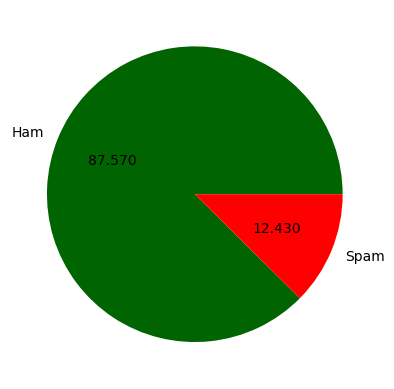

In [15]:
plt.pie(df["Label"].value_counts(),autopct = "%.3f", labels=['Ham','Spam'] , colors =['#006400', '#ff0000'])
plt.show()

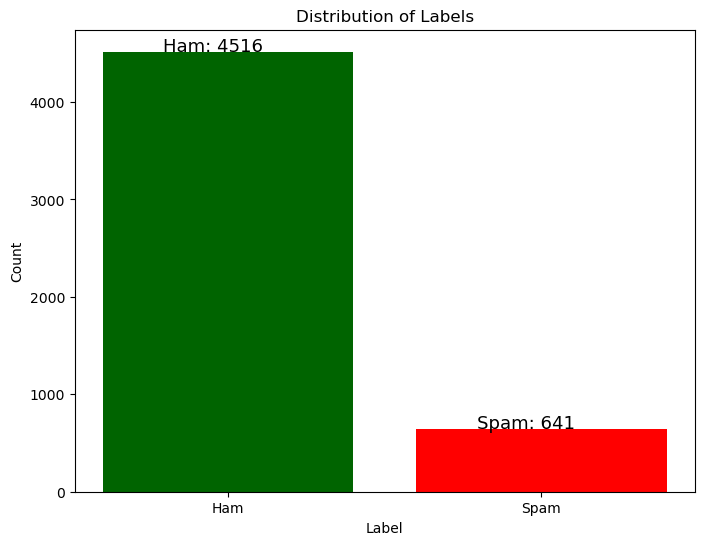

In [16]:
# Count the occurrences of each label
label_counts = df['Label'].value_counts()

# Mapping label as 'Ham' and 'Spam'
labels = label_counts.index.map({0: 'Ham', 1: 'Spam'})

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, label_counts.values, color=['#006400', '#ff0000'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Add count labels on top of the bars
for bar, label, count in zip(bars, labels, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, count + 5, f'{label}: {count}', ha='center', fontsize=13 )

plt.show()


In [17]:
# Data is imbalanced.
# Having less values of Spam messages than ham messages in the dataset.

### Step 2: Feature Engineering

In [18]:
# Total No. of Characters in Data
df["characters"] = df["Email"].apply(len)

In [19]:
# Total No. of Words in Data
df["word"] = df["Email"].apply(lambda x:len( nltk.word_tokenize(x)))

In [20]:
# Total No. of Sentence
df["sentence"] = df["Email"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head(3)

Label                                              Email  characters  word  \
0      0  Go until jurong point, crazy.. Available only ...         111    24   
1      0                      Ok lar... Joking wif u oni...          29     8   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...         155    37   

   sentence  
0         2  
1         2  
2         2

In [22]:
# Statistical Analysis of new features
df[["characters","word", "sentence"]].describe()

characters         word     sentence
count  5157.000000  5157.000000  5157.000000
mean     79.103936    18.557882     1.950553
std      58.382922    13.406024     1.362981
min       2.000000     1.000000     1.000000
25%      36.000000     9.000000     1.000000
50%      61.000000    15.000000     1.000000
75%     118.000000    26.000000     2.000000
max     910.000000   220.000000    28.000000

In [23]:
# Statistical Analysis for HAM Data
df[df["Label"]==0][["characters","word", "sentence"]].describe()

characters         word     sentence
count  4516.000000  4516.000000  4516.000000
mean     70.869353    17.264836     1.806244
std      56.708301    13.587852     1.281910
min       2.000000     1.000000     1.000000
25%      34.000000     8.000000     1.000000
50%      53.000000    13.000000     1.000000
75%      91.000000    22.000000     2.000000
max     910.000000   220.000000    28.000000

In [24]:
# Statistical Analysis for SPAM Data
df[df["Label"] ==1][["characters","word", "sentence"]].describe()

characters        word    sentence
count  641.000000  641.000000  641.000000
mean   137.118565   27.667707    2.967239
std     30.399707    7.103501    1.480241
min      7.000000    2.000000    1.000000
25%    130.000000   25.000000    2.000000
50%    148.000000   29.000000    3.000000
75%    157.000000   32.000000    4.000000
max    223.000000   46.000000    8.000000

In [25]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["Label"]==0]["characters"],label= "ham",color="green")
sns.histplot(df[df["Label"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

In [26]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["Label"]==0]["word"],label= "ham",color="green")
sns.histplot(df[df["Label"]==1]["word"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show()

### Step 3: Feature Extraction ( TF-IDF (Term Frequency-Inverse Document Frequency) )

In [27]:
# Data Split
X=df["Email"]
y=df["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Step 2: Transform the training data
X_train_features = tfidf_vectorizer.fit_transform(X_train)

# Step 3: Transform the testing data
X_test_features = tfidf_vectorizer.transform(X_test)

# Step 4: Encode the labels as integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Now, X_train_features and X_test_features contain TF-IDF features,
# and y_train and y_test contain integer-encoded labels, ready for modeling.


## Step 4: Model Selection ( Using Logistric Regression and SVM )

## Logistic Regression

In [28]:
# Model Training
classifier = LogisticRegression()
classifier.fit(X_train_features, y_train)

y_pred = classifier.predict(X_test_features)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Classification Report \n",report)


Accuracy: 0.9525193798449613
Classification Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       896
           1       0.96      0.67      0.79       136

    accuracy                           0.95      1032
   macro avg       0.95      0.83      0.88      1032
weighted avg       0.95      0.95      0.95      1032



In [29]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## SVM : Support Vector Machine

Accuracy: 0.98
Classification Report 
                precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       896
        Spam       0.95      0.93      0.94       136

    accuracy                           0.98      1032
   macro avg       0.97      0.96      0.96      1032
weighted avg       0.98      0.98      0.98      1032



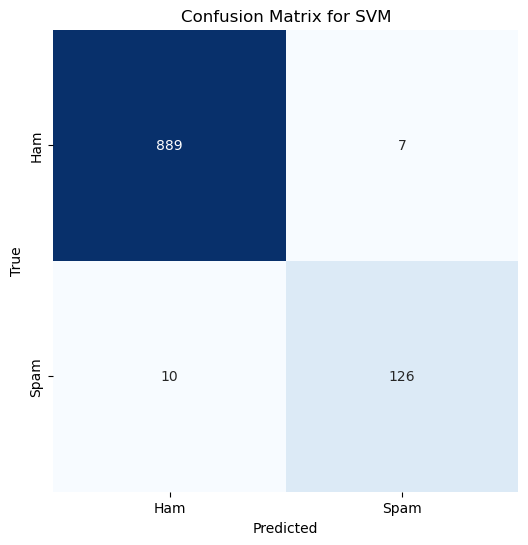

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Transform the training data
X_train_features = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_features = tfidf_vectorizer.transform(X_test)

# After fitting the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# Encode the labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_features, y_train_encoded)
joblib.dump(svm_classifier, 'svm_model.pkl')

# Make predictions
y_pred = svm_classifier.predict(X_test_features)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# classification report
report = classification_report(y_test_encoded, y_pred, target_names=['Ham', 'Spam'])
print(f"Classification Report \n ",report)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()


####  -- The SVM model outperforms the Logistic Regression model in terms of accuracy, precision, recall, and F1-score for both classes (Ham and Spam).

#### -- The SVM model is particularly strong in correctly identifying instances of class "Ham," achieving near-perfect precision, recall, and F1-score for this class.

#### -- Overall, based on these evaluation metrics, the SVM model appears to be the better-performing model for this classification task. It provides a higher level of accuracy and better balance between precision   and recall for both classes.

## Step 5: Deployment (using the trained SVM model)

In [40]:
import tkinter as tk
from tkinter import ttk

# Load the trained SVM model
svm_model = joblib.load('svm_model.pkl')

# Load the TF-IDF vectorizer
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# a function to classify the input email and update the GUI label with the result
def classify_email():
    email_text = email_entry.get()
    if email_text:
        # Transform the input text using the loaded TF-IDF vectorizer
        email_features = tfidf_vectorizer.transform([email_text])
        # Make the prediction using the SVM model
        prediction = svm_model.predict(email_features)
        if prediction[0] == 0:
            result_label.config(text="Prediction: Ham", foreground="green")
        else:
            result_label.config(text="Prediction: Spam", foreground="red")
    else:
        result_label.config(text="Please enter an email.")

# Create the main window
root = tk.Tk()
root.title("Email Classifier")

# Create and configure the GUI components
frame = ttk.Frame(root, padding=10)
frame.grid(column=0, row=0, sticky=(tk.W, tk.E, tk.N, tk.S))

email_label = ttk.Label(frame, text="Enter an email:")
email_label.grid(column=0, row=0, padx=5, pady=5)

email_entry = ttk.Entry(frame, width=50)
email_entry.grid(column=1, row=0, padx=5, pady=5)

classify_button = ttk.Button(frame, text="Classify", command=classify_email)
classify_button.grid(column=2, row=0, padx=5, pady=5)

result_label = ttk.Label(frame, text="", font=("Helvetica", 14))
result_label.grid(column=0, row=1, columnspan=3, padx=5, pady=10)

# Start the GUI event loop
root.mainloop()
